In [2]:
import os 
import matplotlib.pyplot as plt
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# total_50_all_start = {}
# total_50_abcd = {}
# total_50_cadb = {}
# total_50_all_middle = {}
# total_50_all_end = {}
# total_50_dcba = {}

total_50_gpt_result = {}
total_50_gemini_1_5_result = {}
total_50_gemini_2_flash_result = {}
total_50_qwen_result = {}
total_50_llama_result = {}

for filename in os.listdir('.'):
    if filename.endswith('.jsonl') and os.path.isfile(filename):  
        with open(filename, 'r', encoding='utf-8') as f:
            data = [json.loads(line) for line in f]  
            
        # Determine which model type this is for
        if "gpt" in filename:
            target_dict = total_50_gpt_result
        elif "gemini_2.0" in filename or "gemini_2_0" in filename:
            target_dict = total_50_gemini_2_flash_result
        elif "gemini_pro_1.5" in filename or "gemini_pro_1_5" in filename:
            target_dict = total_50_gemini_1_5_result
        elif "qwen" in filename:
            target_dict = total_50_qwen_result
        elif "llama" in filename:
            target_dict = total_50_llama_result
        else:
            print(f"Warning: Unknown model type in filename: {filename}")
            continue
            
        # Categorize by index pattern
        if filename.startswith('total_50_index_0_1_2_3'):
            target_dict[filename] = data
        elif filename.startswith('total_50_index_0_24_74_99'):
            target_dict[filename] = data
        elif filename.startswith('total_50_index_24_99_0_74'):
            target_dict[filename] = data
        elif filename.startswith('total_50_index_71_72_73_74'):
            target_dict[filename] = data
        elif filename.startswith('total_50_index_96_97_98_99'):
            target_dict[filename] = data
        elif filename.startswith('total_50_index_99_74_24_0'):
            target_dict[filename] = data
        else:
            print(f"Error: Unrecognized filename pattern: {filename}")

In [4]:
# print(total_50_gemini_2_flash_result)
# print(total_50_gpt_result)
# print(total_50_gemini_1_5_result)
# print(total_50_qwen_result)
print(total_50_llama_result)

{'total_50_index_0_1_2_3_result_llama_3_3_70b_instruct.jsonl': [{'id': 0, 'prompt': 'Several words below are interconnected. For example:\n"X" is connected to "Y"\n"Y" is connected to "Z"\nIn this scenario, the origin of "Z" is "X". We can visualize these connections as vertices and edges, like this:\n"X"-->"Y"-->"Z"\n\nUsing this logic, consider the following list of connections, where each word is simply the name of a vertex with no other semantic meaning:\n\n"woodruff" is connected to "clues"\n"clues" is connected to "parked"\n"parked" is connected to "ah"\n"ah" is connected to "exceptional"\n"delicate" is connected to "courses"\n"screaming" is connected to "evanston"\n"fringe" is connected to "pipe"\n"cents" is connected to "shaved"\n"bother" is connected to "tammany"\n"personal" is connected to "healthy"\n"disease" is connected to "cuts"\n"rector" is connected to "ranch"\n"southward" is connected to "uncertain"\n"cleaned" is connected to "attending"\n"sugar" is connected to "comme

In [5]:
gpt_results = []
for key, value in total_50_gpt_result.items():
    num_correct = 0
    num_total = 0
    for i, item in enumerate(value):
        num_total += 1
        if item['correct']:
            num_correct += 1
    gpt_results.append((key, num_correct / num_total))



In [6]:
print(gpt_results)

[('total_50_index_0_1_2_3_result_gpt_4o.jsonl', 1.0), ('total_50_index_0_24_74_99_result_gpt_4o.jsonl', 1.0), ('total_50_index_24_99_0_74_result_gpt_4o.jsonl', 0.06), ('total_50_index_71_72_73_74_result_gpt_4o.jsonl', 0.4), ('total_50_index_96_97_98_99_result_gpt_4o.jsonl', 0.3), ('total_50_index_99_74_24_0_result_gpt_4o.jsonl', 0.9)]


In [24]:
# 0, 1, 2, 3 is start
# 0, 24, 74, 99 is middle_spread
# 24, 99, 0, 74 is reversed_spread
# 71, 72, 73, 74 is middle_narrow
# 96, 97, 98, 99 is end
# 99, 74, 24, 0 is reversed_start

convert_name = {"0_1_2_3" : "start", "0_24_74_99" : "middle_spread", "24_99_0_74" : "spread_inside_out", "71_72_73_74" : "middle_narrow", "96_97_98_99" : "end", "99_74_24_0" : "reversed_start"}

gpt_plot_results = []
for key, value in convert_name.items():
    for k, v in gpt_results:
        if key in k:
            gpt_plot_results.append((value, v))
            break

print(gpt_plot_results)

[('start', 1.0), ('middle_spread', 1.0), ('spread_inside_out', 0.06), ('middle_narrow', 0.4), ('end', 0.3), ('reversed_start', 0.9)]


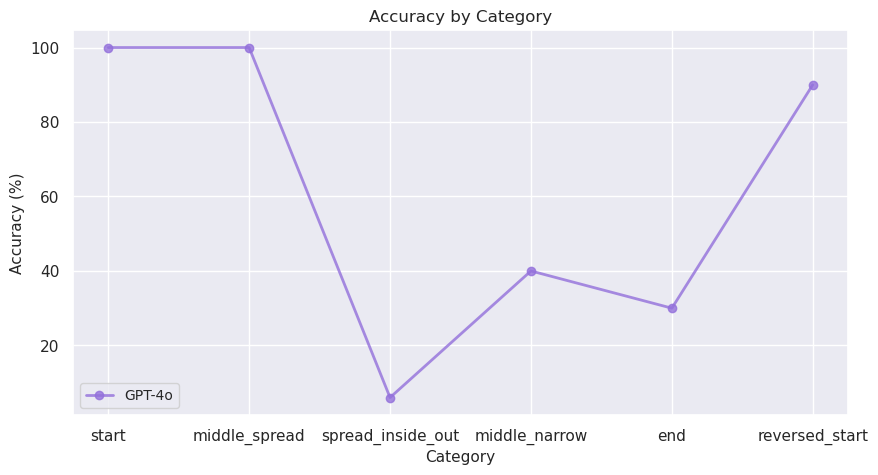

In [25]:
data = gpt_plot_results
# Extract x and y values
x_labels, y_values = zip(*data)

# Set Seaborn style
sns.set(style="darkgrid")

# Create the figure and axis
plt.figure(figsize=(10, 5))

# Plot data points with a smooth line
plt.plot(x_labels, [val * 100 for val in y_values], marker='o', markersize=6, linestyle='-', linewidth=2, alpha=0.8, color='mediumpurple', label="GPT-4o")

# Labels and title
plt.xlabel("Category", fontsize=11)
plt.ylabel("Accuracy (%)", fontsize=11)
plt.title("Accuracy by Category", fontsize=12)

# Add a legend inside the plot
plt.legend(loc="lower left", fontsize=10, frameon=True)

# Show the plot
plt.show()

# Gemini 1.5 Pro

In [26]:
gemini_1_5_results = []
for key, value in total_50_gemini_1_5_result.items():
    num_correct = 0
    num_total = 0
    for i, item in enumerate(value):
        num_total += 1
        if item['correct']:
            num_correct += 1
    gemini_1_5_results.append((key, num_correct / num_total))

In [27]:
gemini_1_5_plot_results = []
for key, value in convert_name.items():
    for k, v in gemini_1_5_results:
        if key in k:
            gemini_1_5_plot_results.append((value, v))
            break

print(gemini_1_5_plot_results)

[('start', 0.06), ('middle_spread', 0.0), ('spread_inside_out', 0.0), ('middle_narrow', 0.0), ('end', 0.06), ('reversed_start', 0.0)]


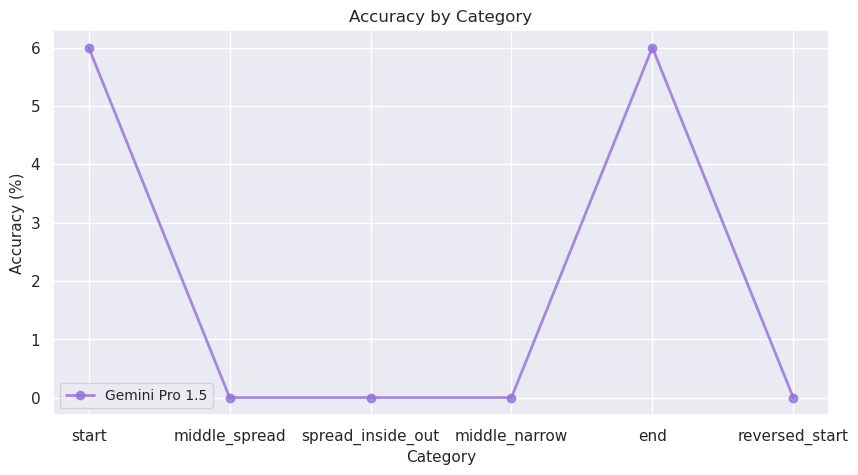

In [28]:
data = gemini_1_5_plot_results
# Extract x and y values
x_labels, y_values = zip(*data)

# Set Seaborn style
sns.set(style="darkgrid")

# Create the figure and axis
plt.figure(figsize=(10, 5))

# Plot data points with a smooth line
plt.plot(x_labels, [val * 100 for val in y_values], marker='o', markersize=6, linestyle='-', linewidth=2, alpha=0.8, color='mediumpurple', label="Gemini Pro 1.5")

# Labels and title
plt.xlabel("Category", fontsize=11)
plt.ylabel("Accuracy (%)", fontsize=11)
plt.title("Accuracy by Category", fontsize=12)

# Add a legend inside the plot
plt.legend(loc="lower left", fontsize=10, frameon=True)

# Show the plot
plt.show()

# Gemini 2.0

In [29]:
gemini_2_flash_results = []
for key, value in total_50_gemini_2_flash_result.items():
    num_correct = 0
    num_total = 0
    for i, item in enumerate(value):
        num_total += 1
        if item['correct']:
            num_correct += 1
    gemini_2_flash_results.append((key, num_correct / num_total))

In [30]:
gemini_2_flash_plot_results = []
for key, value in convert_name.items():
    for k, v in gemini_2_flash_results:
        if key in k:
            gemini_2_flash_plot_results.append((value, v))
            break

print(gemini_2_flash_plot_results)

[('start', 0.34), ('middle_spread', 0.0), ('spread_inside_out', 0.0), ('middle_narrow', 0.0), ('end', 0.32), ('reversed_start', 0.0)]


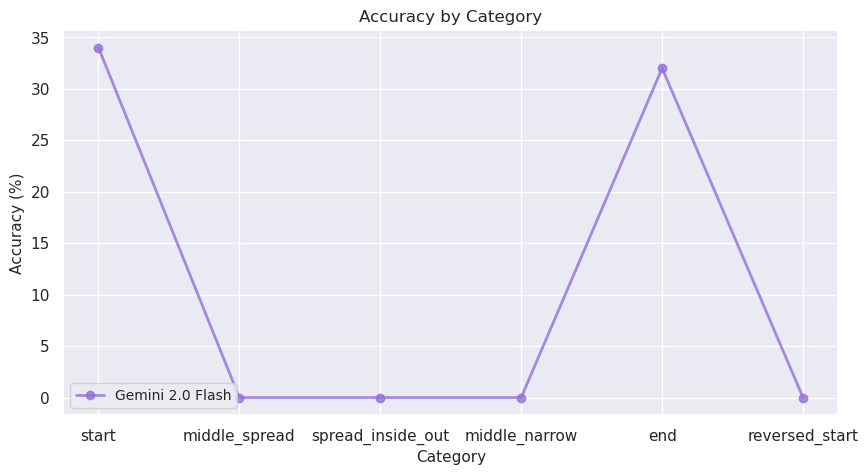

In [31]:
data = gemini_2_flash_plot_results
# Extract x and y values
x_labels, y_values = zip(*data)

# Set Seaborn style
sns.set(style="darkgrid")

# Create the figure and axis
plt.figure(figsize=(10, 5))

# Plot data points with a smooth line
plt.plot(x_labels, [val * 100 for val in y_values], marker='o', markersize=6, linestyle='-', linewidth=2, alpha=0.8, color='mediumpurple', label="Gemini 2.0 Flash")

# Labels and title
plt.xlabel("Category", fontsize=11)
plt.ylabel("Accuracy (%)", fontsize=11)
plt.title("Accuracy by Category", fontsize=12)

# Add a legend inside the plot
plt.legend(loc="lower left", fontsize=10, frameon=True)

# Show the plot
plt.show()

# Qwen

In [32]:
qwen_results = []
for key, value in total_50_qwen_result.items():
    num_correct = 0
    num_total = 0
    for i, item in enumerate(value):
        num_total += 1
        if item['correct']:
            num_correct += 1
    qwen_results.append((key, num_correct / num_total))

In [33]:
qwen_plot_results = []
for key, value in convert_name.items():
    for k, v in qwen_results:
        if key in k:
            qwen_plot_results.append((value, v))
            break

print(qwen_plot_results)

[('start', 1.0), ('middle_spread', 1.0), ('spread_inside_out', 0.52), ('middle_narrow', 0.9), ('end', 0.94), ('reversed_start', 0.92)]


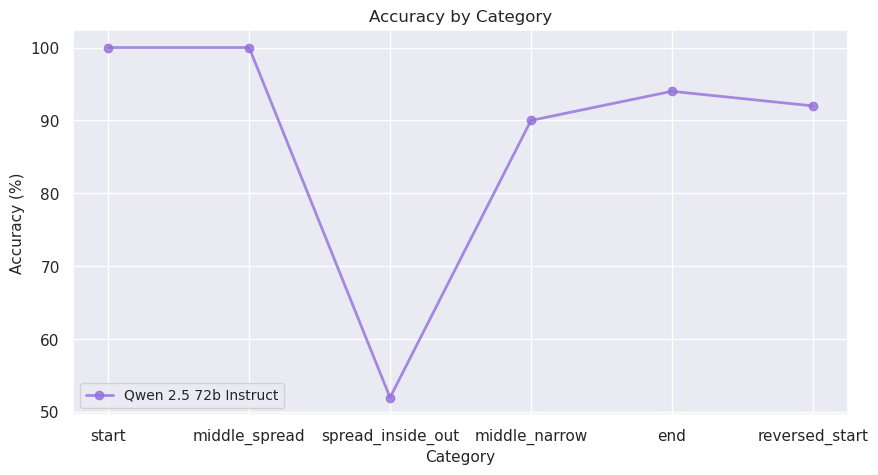

In [34]:
data = qwen_plot_results
# Extract x and y values
x_labels, y_values = zip(*data)

# Set Seaborn style
sns.set(style="darkgrid")

# Create the figure and axis
plt.figure(figsize=(10, 5))

# Plot data points with a smooth line
plt.plot(x_labels, [val * 100 for val in y_values], marker='o', markersize=6, linestyle='-', linewidth=2, alpha=0.8, color='mediumpurple', label="Qwen 2.5 72b Instruct")

# Labels and title
plt.xlabel("Category", fontsize=11)
plt.ylabel("Accuracy (%)", fontsize=11)
plt.title("Accuracy by Category", fontsize=12)

# Add a legend inside the plot
plt.legend(loc="lower left", fontsize=10, frameon=True)

# Show the plot
plt.show()

# LLAMA

In [35]:
llama_results = []
for key, value in total_50_llama_result.items():
    num_correct = 0
    num_total = 0
    for i, item in enumerate(value):
        num_total += 1
        if item['correct']:
            num_correct += 1
    llama_results.append((key, num_correct / num_total))

In [36]:
llama_plot_results = []
for key, value in convert_name.items():
    for k, v in llama_results:
        if key in k:
            llama_plot_results.append((value, v))
            break

print(llama_plot_results)

[('start', 1.0), ('middle_spread', 1.0), ('spread_inside_out', 0.0), ('middle_narrow', 0.74), ('end', 0.56), ('reversed_start', 0.38)]


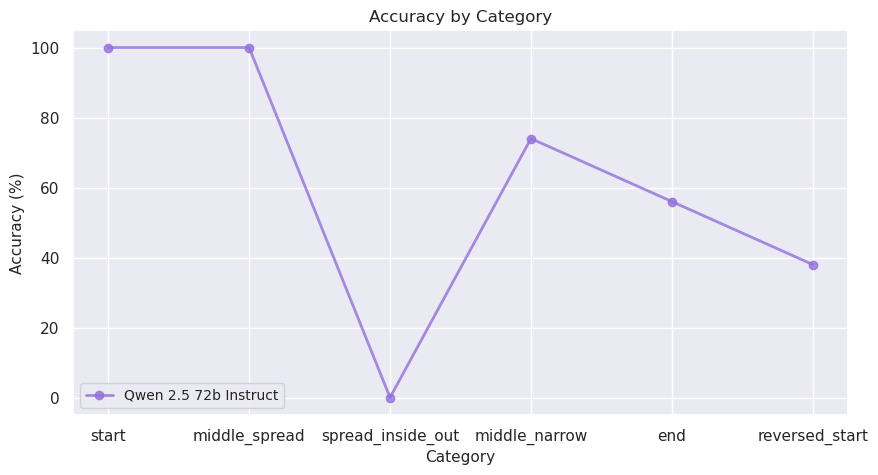

In [37]:
data = llama_plot_results
# Extract x and y values
x_labels, y_values = zip(*data)

# Set Seaborn style
sns.set(style="darkgrid")

# Create the figure and axis
plt.figure(figsize=(10, 5))

# Plot data points with a smooth line
plt.plot(x_labels, [val * 100 for val in y_values], marker='o', markersize=6, linestyle='-', linewidth=2, alpha=0.8, color='mediumpurple', label="Qwen 2.5 72b Instruct")

# Labels and title
plt.xlabel("Category", fontsize=11)
plt.ylabel("Accuracy (%)", fontsize=11)
plt.title("Accuracy by Category", fontsize=12)

# Add a legend inside the plot
plt.legend(loc="lower left", fontsize=10, frameon=True)

# Show the plot
plt.show()

# Aggregate all the results

In [38]:
# Aggreagate all results

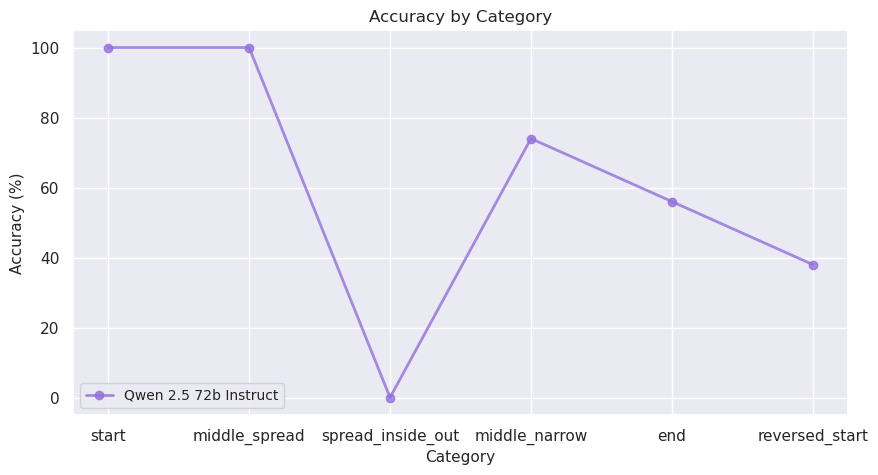

In [39]:
llama_data = llama_plot_results
gpt_data = gpt_plot_results
qwen_data = qwen_plot_results
gemini_data = gemini_2_flash_plot_results
# Extract x and y values
x_labels, y_values = zip(*data)

# Set Seaborn style
sns.set(style="darkgrid")

# Create the figure and axis
plt.figure(figsize=(10, 5))

# Plot data points with a smooth line
plt.plot(x_labels, [val * 100 for val in y_values], marker='o', markersize=6, linestyle='-', linewidth=2, alpha=0.8, color='mediumpurple', label="Qwen 2.5 72b Instruct")

# Labels and title
plt.xlabel("Category", fontsize=11)
plt.ylabel("Accuracy (%)", fontsize=11)
plt.title("Accuracy by Category", fontsize=12)

# Add a legend inside the plot
plt.legend(loc="lower left", fontsize=10, frameon=True)

# Show the plot
plt.show()

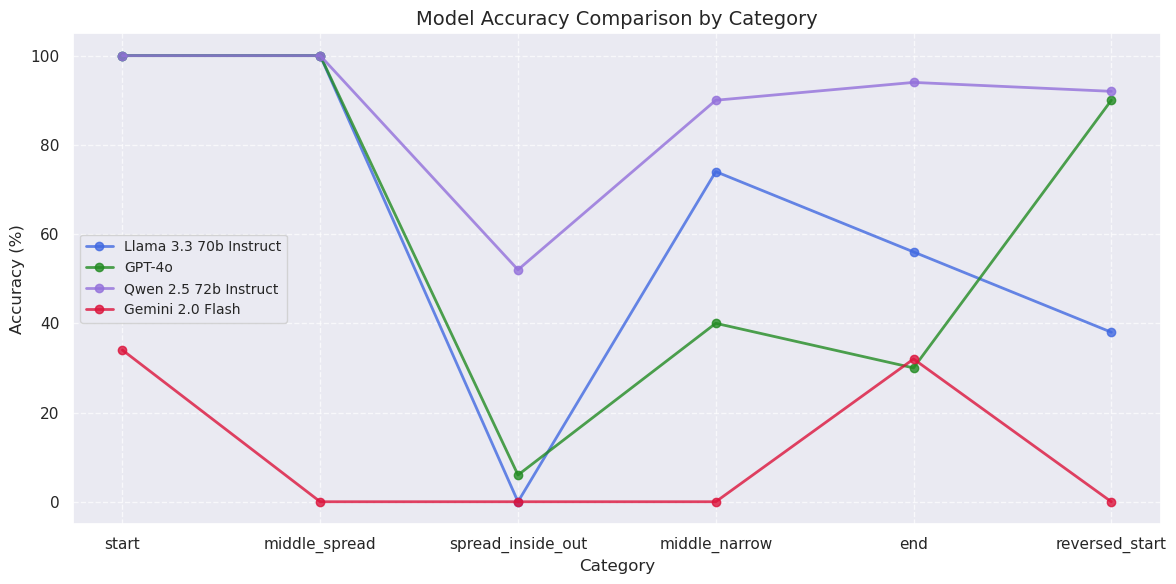

In [40]:
# Get data from all models
llama_data = llama_plot_results
gpt_data = gpt_plot_results
qwen_data = qwen_plot_results
gemini_data = gemini_2_flash_plot_results

# Set Seaborn style
sns.set(style="darkgrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Define colors and models for consistent plotting
models = [
    {"data": llama_data, "color": "royalblue", "label": "Llama 3.3 70b Instruct"},
    {"data": gpt_data, "color": "forestgreen", "label": "GPT-4o"},
    {"data": qwen_data, "color": "mediumpurple", "label": "Qwen 2.5 72b Instruct"},
    {"data": gemini_data, "color": "crimson", "label": "Gemini 2.0 Flash"}
]

# Plot each model's data
for model in models:
    x_labels, y_values = zip(*model["data"])
    plt.plot(
        x_labels, 
        [val * 100 for val in y_values], 
        marker='o', 
        markersize=6, 
        linestyle='-', 
        linewidth=2, 
        alpha=0.8, 
        color=model["color"], 
        label=model["label"]
    )

# Labels and title
plt.xlabel("Category", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy Comparison by Category", fontsize=14)

# Improve x-axis readability if needed
plt.xticks(rotation=45 if len(x_labels) > 6 else 0)
plt.tight_layout()

# Add a legend with better positioning
plt.legend(loc="best", fontsize=10, frameon=True)

# Add grid for easier reading
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()